# 1. Import Libraries

In this notebook, I conduct sentiment analysis and compare the VADER (Valence Aware Dictionary and sEntiment Reasoner) model to Hugging Face's RoBERTa transformer model on music reviews of the album 1000 gecs by 100 gecs. Reviews have been webscraped from https://www.albumoftheyear.org/album/157182-100-gecs-1000-gecs/user-reviews/. 

I chose to perform analysis on this album since it is very divisive and there are plenty of both positive and negative reviews.

In [137]:
# Installing required libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from google.colab import drive 
drive.mount('/content/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [139]:
df = pd.read_csv('gdrive/My Drive/dataset.csv')
df.head(20)

,Username,Review Text,Rating
0,Toasterqueen12,"Y'all know that the ""xXXi_wud_nvrstøp_ÜXXx"" fl...",100
1,Brad Taste,Gecgecgecgec gotgotgotgot\nSaw these two joker...,93
2,MothaOfMotha12,1000 gecs is jam packed with lyrical tracks li...,99
3,Chode,This seriously has the potential to be one of ...,80
4,cakenator,October: man this album sucksNovember: oh god ...,85
5,lexa 🍃,EDIT: it just keeps getting better. stupid hor...,90
6,Pipe,"Oh Melon, what pleasentries await me?\nSo I ha...",65
7,Laz,"Sits somewhere between smart, boundary-pushing...",90
8,Kanye,never fucking mind this is terrible,35
9,usedtobe,"Look, I am all out for music pushing its bound...",0


# 2. Data Pre-processing

In [140]:
def convert_rating(rating):
    if rating >= 0 and rating <= 10:
        rating = 0.5
    elif rating >= 11 and rating <= 20:
        rating = 1
    elif rating >= 21 and rating <= 30:
        rating = 1.5
    elif rating >= 31 and rating <= 40:
        rating = 2
    elif rating >= 41 and rating <= 50:
        rating = 2.5
    elif rating >= 51 and rating <= 60:
        rating = 3
    elif rating >= 61 and rating <= 70:
        rating = 3.5
    elif rating >= 71 and rating <= 80:
        rating = 4
    elif rating >= 81 and rating <= 90:
        rating = 4.5
    elif rating >= 91 and rating <= 100:
        rating = 5
    return rating

def remove_emojis(text):
    # Reference: https://en.wikipedia.org/wiki/Unicode_block
    EMOJI_PATTERN = re.compile(pattern="(["
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        "])"
    )
    text = re.sub(EMOJI_PATTERN, r' ', text)
    return text

# Convert Rating
df['Rating'] = df['Rating'].apply(convert_rating)

# Remove links
df['processed_review'] = df['Review Text'].map(lambda x: re.sub(r"http\S+", "", x))

# Convert &amp to &
df['processed_review'] = df['processed_review'].map(lambda x: re.sub(r"&amp;", "&", x))

# Remove line breaks
df['processed_review'] = df['processed_review'].map(lambda x: re.sub(r"\n", "", x))

# Lowercase Text
df['processed_review'] = df['processed_review'].map(lambda x: x.lower())

# Remove emojis
df['processed_review'] = df['processed_review'].apply(remove_emojis)

# Remove leading, trailing, and replace inner spaces
df['processed_review'] = df['processed_review'].map(lambda x: re.sub("[\t ]+", " ", x).strip())

df.head(20)

,Username,Review Text,Rating,processed_review
0,Toasterqueen12,"Y'all know that the ""xXXi_wud_nvrstøp_ÜXXx"" fl...",5.0,"y'all know that the ""xxxi_wud_nvrstøp_üxxx"" fl..."
1,Brad Taste,Gecgecgecgec gotgotgotgot\nSaw these two joker...,5.0,gecgecgecgec gotgotgotgotsaw these two jokers ...
2,MothaOfMotha12,1000 gecs is jam packed with lyrical tracks li...,5.0,1000 gecs is jam packed with lyrical tracks li...
3,Chode,This seriously has the potential to be one of ...,4.0,this seriously has the potential to be one of ...
4,cakenator,October: man this album sucksNovember: oh god ...,4.5,october: man this album sucksnovember: oh god ...
5,lexa 🍃,EDIT: it just keeps getting better. stupid hor...,4.5,edit: it just keeps getting better. stupid hor...
6,Pipe,"Oh Melon, what pleasentries await me?\nSo I ha...",3.5,"oh melon, what pleasentries await me?so i had ..."
7,Laz,"Sits somewhere between smart, boundary-pushing...",4.5,"sits somewhere between smart, boundary-pushing..."
8,Kanye,never fucking mind this is terrible,2.0,never fucking mind this is terrible
9,usedtobe,"Look, I am all out for music pushing its bound...",0.5,"look, i am all out for music pushing its bound..."


# 3. Quick Overview of Data

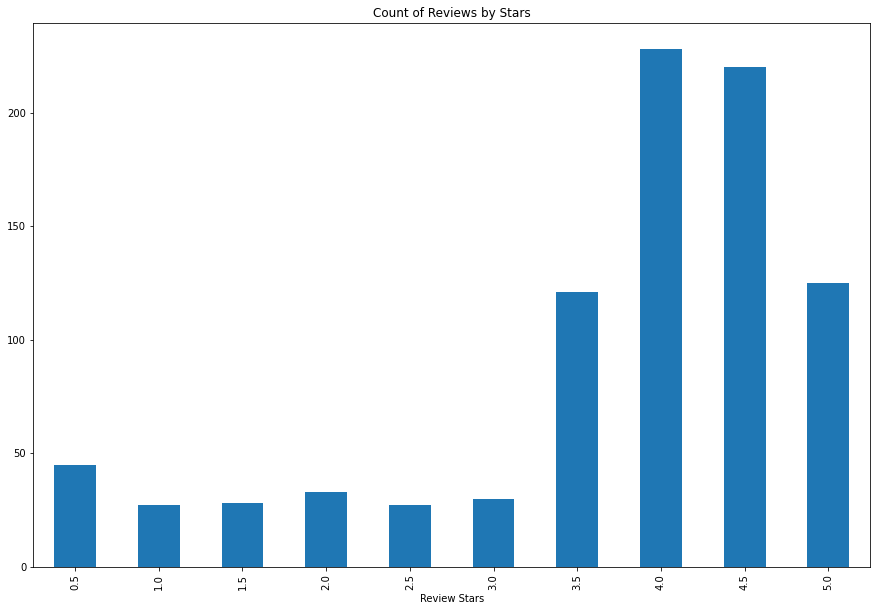

In [141]:
overview = df['Rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars',
                                                         figsize=(15, 10))
overview.set_xlabel('Review Stars')
plt.show()

I create a wordcloud to visualize the most common words in the reviews. I create a separate column 'no_stop_words' that removes stop words and punctuation in order to get a clearer picture about the reviews

In [142]:
stop_words = set(stopwords.words('english'))
def remove_stop_words(sentence):
    tokens = word_tokenize(sentence)
    filtered = ""
    for w in tokens:
        if w not in stop_words:
            filtered = filtered + w + " "
    filtered.translate(str.maketrans('', '', string.punctuation))
    return filtered

# Remove stop words
df['no_stop_words'] = df['processed_review'].apply(remove_stop_words)
# Remove punctuation and other unnecessary occurrences
df['no_stop_words'] = df['no_stop_words'].map(lambda x: re.sub(r"[‘’']s","",x))
df['no_stop_words'] = df['no_stop_words'].map(lambda x: re.sub(r"[\.,!?:]|``|''|n't", "", x))
df['no_stop_words'] = df['no_stop_words'].map(lambda x: re.sub(r"[=|—#]", " ", x))
df.head(20)

,Username,Review Text,Rating,processed_review,no_stop_words
0,Toasterqueen12,"Y'all know that the ""xXXi_wud_nvrstøp_ÜXXx"" fl...",5.0,"y'all know that the ""xxxi_wud_nvrstøp_üxxx"" fl...",y'all know xxxi_wud_nvrstøp_üxxx flow soulja...
1,Brad Taste,Gecgecgecgec gotgotgotgot\nSaw these two joker...,5.0,gecgecgecgec gotgotgotgotsaw these two jokers ...,gecgecgecgec gotgotgotgotsaw two jokers live ...
2,MothaOfMotha12,1000 gecs is jam packed with lyrical tracks li...,5.0,1000 gecs is jam packed with lyrical tracks li...,1000 gecs jam packed lyrical tracks like gecg...
3,Chode,This seriously has the potential to be one of ...,4.0,this seriously has the potential to be one of ...,seriously potential one influential albums 201...
4,cakenator,October: man this album sucksNovember: oh god ...,4.5,october: man this album sucksnovember: oh god ...,october man album sucksnovember oh god reall...
5,lexa 🍃,EDIT: it just keeps getting better. stupid hor...,4.5,edit: it just keeps getting better. stupid hor...,edit keeps getting better stupid horse grown...
6,Pipe,"Oh Melon, what pleasentries await me?\nSo I ha...",3.5,"oh melon, what pleasentries await me?so i had ...",oh melon pleasentries await idea expect albu...
7,Laz,"Sits somewhere between smart, boundary-pushing...",4.5,"sits somewhere between smart, boundary-pushing...",sits somewhere smart boundary-pushing experim...
8,Kanye,never fucking mind this is terrible,2.0,never fucking mind this is terrible,never fucking mind terrible
9,usedtobe,"Look, I am all out for music pushing its bound...",0.5,"look, i am all out for music pushing its bound...",look music pushing boundaries experimental st...


In [143]:
word_frequency_series = df.no_stop_words.str.split(expand=True).stack().value_counts()
word_frequency_series

gec          754
album        743
like         528
gecs         308
’            301
            ... 
ignorable      1
abhorrent      1
unafraid       1
vivid          1
60why          1
Length: 6615, dtype: int64

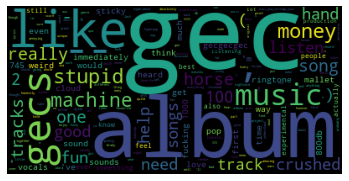

In [144]:
wordcloud = WordCloud().generate_from_frequencies(word_frequency_series.to_dict())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 4. VADER Sentiment Analysis

NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) model works by using a 'bag of words' approach in which:
    <ul>
      <li>Stop words are removed and the sentence is tokenized.</li>
      <li>Each token's sentiment is scored and compounded so that the sentence receives a total sentiment score.</li>
    </ul>

In [145]:
example = df['processed_review'][100]
print(example)

this album is utter dumpster juice. the production on here at times simple and cute but what makes this so much worse is the vocals. fucking hell! laura and the gang vocals are ear-piercing in all the wrong ways, while the lyrics being dumb and not as humorous. the genre mash up ain't as special either, just taking all the worst traits of my least fav genres/bands putting it to one didn't help. overall, i can see why people like this album of how odd and fun this may be. but personally, this is just a mess to listen 2.


In [146]:
word_tokenize(example)

['this',
 'album',
 'is',
 'utter',
 'dumpster',
 'juice',
 '.',
 'the',
 'production',
 'on',
 'here',
 'at',
 'times',
 'simple',
 'and',
 'cute',
 'but',
 'what',
 'makes',
 'this',
 'so',
 'much',
 'worse',
 'is',
 'the',
 'vocals',
 '.',
 'fucking',
 'hell',
 '!',
 'laura',
 'and',
 'the',
 'gang',
 'vocals',
 'are',
 'ear-piercing',
 'in',
 'all',
 'the',
 'wrong',
 'ways',
 ',',
 'while',
 'the',
 'lyrics',
 'being',
 'dumb',
 'and',
 'not',
 'as',
 'humorous',
 '.',
 'the',
 'genre',
 'mash',
 'up',
 'ai',
 "n't",
 'as',
 'special',
 'either',
 ',',
 'just',
 'taking',
 'all',
 'the',
 'worst',
 'traits',
 'of',
 'my',
 'least',
 'fav',
 'genres/bands',
 'putting',
 'it',
 'to',
 'one',
 'did',
 "n't",
 'help',
 '.',
 'overall',
 ',',
 'i',
 'can',
 'see',
 'why',
 'people',
 'like',
 'this',
 'album',
 'of',
 'how',
 'odd',
 'and',
 'fun',
 'this',
 'may',
 'be',
 '.',
 'but',
 'personally',
 ',',
 'this',
 'is',
 'just',
 'a',
 'mess',
 'to',
 'listen',
 '2',
 '.']

In [147]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [148]:
# VADER scores on example sentence
print(sia.polarity_scores(example))
test = pd.DataFrame(sia.polarity_scores(example), index=[1])
test

{'neg': 0.328, 'neu': 0.602, 'pos': 0.07, 'compound': -0.9895}


,neg,neu,pos,compound
1,0.328,0.602,0.07,-0.9895


In [149]:
scores = []
for i, row in df.iterrows():
    scores.append(sia.polarity_scores(row['processed_review']))
vader = pd.DataFrame(scores).reset_index()
vader.head(20)

,index,neg,neu,pos,compound
0,0,0.097,0.781,0.122,0.6257
1,1,0.052,0.843,0.104,0.7351
2,2,0.000,0.722,0.278,0.6124
3,3,0.031,0.880,0.089,0.3604
4,4,0.000,0.822,0.178,0.7837
5,5,0.189,0.669,0.142,-0.9921
6,6,0.110,0.756,0.134,0.8896
7,7,0.157,0.571,0.271,0.3395
8,8,0.383,0.617,0.000,-0.4767
9,9,0.267,0.688,0.045,-0.9274


In [150]:
vader = vader.merge(df.reset_index(), how='left')
vader = vader.rename(columns={'index': 'ID'})
vader.head(20)

,ID,neg,neu,pos,compound,Username,Review Text,Rating,processed_review,no_stop_words
0,0,0.097,0.781,0.122,0.6257,Toasterqueen12,"Y'all know that the ""xXXi_wud_nvrstøp_ÜXXx"" fl...",5.0,"y'all know that the ""xxxi_wud_nvrstøp_üxxx"" fl...",y'all know xxxi_wud_nvrstøp_üxxx flow soulja...
1,1,0.052,0.843,0.104,0.7351,Brad Taste,Gecgecgecgec gotgotgotgot\nSaw these two joker...,5.0,gecgecgecgec gotgotgotgotsaw these two jokers ...,gecgecgecgec gotgotgotgotsaw two jokers live ...
2,2,0.000,0.722,0.278,0.6124,MothaOfMotha12,1000 gecs is jam packed with lyrical tracks li...,5.0,1000 gecs is jam packed with lyrical tracks li...,1000 gecs jam packed lyrical tracks like gecg...
3,3,0.031,0.880,0.089,0.3604,Chode,This seriously has the potential to be one of ...,4.0,this seriously has the potential to be one of ...,seriously potential one influential albums 201...
4,4,0.000,0.822,0.178,0.7837,cakenator,October: man this album sucksNovember: oh god ...,4.5,october: man this album sucksnovember: oh god ...,october man album sucksnovember oh god reall...
5,5,0.189,0.669,0.142,-0.9921,lexa 🍃,EDIT: it just keeps getting better. stupid hor...,4.5,edit: it just keeps getting better. stupid hor...,edit keeps getting better stupid horse grown...
6,6,0.110,0.756,0.134,0.8896,Pipe,"Oh Melon, what pleasentries await me?\nSo I ha...",3.5,"oh melon, what pleasentries await me?so i had ...",oh melon pleasentries await idea expect albu...
7,7,0.157,0.571,0.271,0.3395,Laz,"Sits somewhere between smart, boundary-pushing...",4.5,"sits somewhere between smart, boundary-pushing...",sits somewhere smart boundary-pushing experim...
8,8,0.383,0.617,0.000,-0.4767,Kanye,never fucking mind this is terrible,2.0,never fucking mind this is terrible,never fucking mind terrible
9,9,0.267,0.688,0.045,-0.9274,usedtobe,"Look, I am all out for music pushing its bound...",0.5,"look, i am all out for music pushing its bound...",look music pushing boundaries experimental st...


### Plot VADER Results

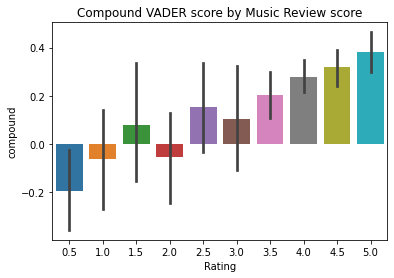

In [151]:
vader_plot = sns.barplot(data=vader, x='Rating', y='compound')
vader_plot.set_title('Compound VADER score by Music Review score')
plt.show()

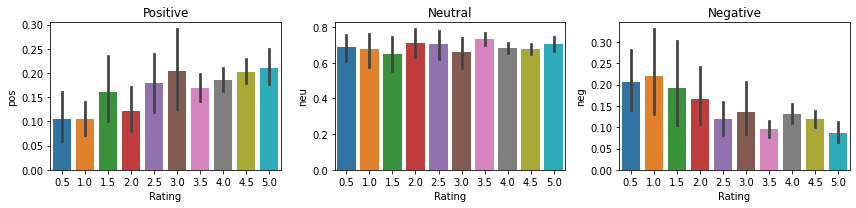

In [152]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vader, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vader, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vader, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

The results show that the lower the rating, the lower the compound VADER score, and vice versa. This is to be expected. The main outlier here is that reviewers who gave the album 1.5 stars wrote more positive reviews compared to those who wrote 2 star reviews - a consequence likely arising from VADER's inability to detect sarcastic and ironic reviews since treats each word as independent events.

# 5. RoBERTa Model for Sentiment Analysis

In the following section, I use Hugging Face's RoBERTa model
<ul>
  <li>It is a transformer model pretrained on a large corpus of English data in a self-supervised fashion.</li>
  <li>Since it is a transformer model, it accounts for the score of each tokenized word in relation to other words (using context).</li>
</ul>

Reference: https://huggingface.co/roberta-base

In [153]:
# !pip install transformers 
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [154]:
# This model was trained on twitter tweets, and has pre-assigned weights on words
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [155]:
print(example)

this album is utter dumpster juice. the production on here at times simple and cute but what makes this so much worse is the vocals. fucking hell! laura and the gang vocals are ear-piercing in all the wrong ways, while the lyrics being dumb and not as humorous. the genre mash up ain't as special either, just taking all the worst traits of my least fav genres/bands putting it to one didn't help. overall, i can see why people like this album of how odd and fun this may be. but personally, this is just a mess to listen 2.


In [156]:
# VADER scores on example sentence
print(sia.polarity_scores(example))

{'neg': 0.328, 'neu': 0.602, 'pos': 0.07, 'compound': -0.9895}


In [157]:
# RoBERTa scores on example sentence
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9560489, 'roberta_neu': 0.03712052, 'roberta_pos': 0.0068305237}


In [158]:
# Some review text might be too big for the RoBERTa model to handle, and so I return 'None' for those scores
def get_roberta_scores(sentence):
  try:
    encoded_text = tokenizer(sentence, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
  except RuntimeError:
    scores_dict = {
        'roberta_neg' : None,
        'roberta_neu' : None,
        'roberta_pos' : None
    }
  return scores_dict

roberta_scores = []
for i, row in df.iterrows():
    roberta_scores.append(get_roberta_scores(row['processed_review']))
roberta = pd.DataFrame(roberta_scores).reset_index()
roberta.head(20)

,index,roberta_neg,roberta_neu,roberta_pos
0,0,0.123374,0.285954,0.590672
1,1,0.024237,0.146754,0.829009
2,2,0.008818,0.396722,0.594461
3,3,0.001786,0.057076,0.941138
4,4,0.634102,0.254833,0.111065
5,5,NaN,NaN,NaN
6,6,0.412831,0.378278,0.208891
7,7,0.491306,0.377633,0.131061
8,8,0.975758,0.020255,0.003986
9,9,0.951201,0.042733,0.006066


In [159]:
roberta = roberta.rename(columns={'index': 'ID'})
results_final = roberta.merge(vader, how='left')
results_final = results_final.rename(columns={'neg':'vader_neg', 'neu':'vader_neu', 'pos':'vader_pos', 'compound':'vader_compound'})
results_final.head(20)

,ID,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,Username,Review Text,Rating,processed_review,no_stop_words
0,0,0.123374,0.285954,0.590672,0.097,0.781,0.122,0.6257,Toasterqueen12,"Y'all know that the ""xXXi_wud_nvrstøp_ÜXXx"" fl...",5.0,"y'all know that the ""xxxi_wud_nvrstøp_üxxx"" fl...",y'all know xxxi_wud_nvrstøp_üxxx flow soulja...
1,1,0.024237,0.146754,0.829009,0.052,0.843,0.104,0.7351,Brad Taste,Gecgecgecgec gotgotgotgot\nSaw these two joker...,5.0,gecgecgecgec gotgotgotgotsaw these two jokers ...,gecgecgecgec gotgotgotgotsaw two jokers live ...
2,2,0.008818,0.396722,0.594461,0.000,0.722,0.278,0.6124,MothaOfMotha12,1000 gecs is jam packed with lyrical tracks li...,5.0,1000 gecs is jam packed with lyrical tracks li...,1000 gecs jam packed lyrical tracks like gecg...
3,3,0.001786,0.057076,0.941138,0.031,0.880,0.089,0.3604,Chode,This seriously has the potential to be one of ...,4.0,this seriously has the potential to be one of ...,seriously potential one influential albums 201...
4,4,0.634102,0.254833,0.111065,0.000,0.822,0.178,0.7837,cakenator,October: man this album sucksNovember: oh god ...,4.5,october: man this album sucksnovember: oh god ...,october man album sucksnovember oh god reall...
5,5,NaN,NaN,NaN,0.189,0.669,0.142,-0.9921,lexa 🍃,EDIT: it just keeps getting better. stupid hor...,4.5,edit: it just keeps getting better. stupid hor...,edit keeps getting better stupid horse grown...
6,6,0.412831,0.378278,0.208891,0.110,0.756,0.134,0.8896,Pipe,"Oh Melon, what pleasentries await me?\nSo I ha...",3.5,"oh melon, what pleasentries await me?so i had ...",oh melon pleasentries await idea expect albu...
7,7,0.491306,0.377633,0.131061,0.157,0.571,0.271,0.3395,Laz,"Sits somewhere between smart, boundary-pushing...",4.5,"sits somewhere between smart, boundary-pushing...",sits somewhere smart boundary-pushing experim...
8,8,0.975758,0.020255,0.003986,0.383,0.617,0.000,-0.4767,Kanye,never fucking mind this is terrible,2.0,never fucking mind this is terrible,never fucking mind terrible
9,9,0.951201,0.042733,0.006066,0.267,0.688,0.045,-0.9274,usedtobe,"Look, I am all out for music pushing its bound...",0.5,"look, i am all out for music pushing its bound...",look music pushing boundaries experimental st...


# 6. Visualizing and comparing VADER and RoBERTa models

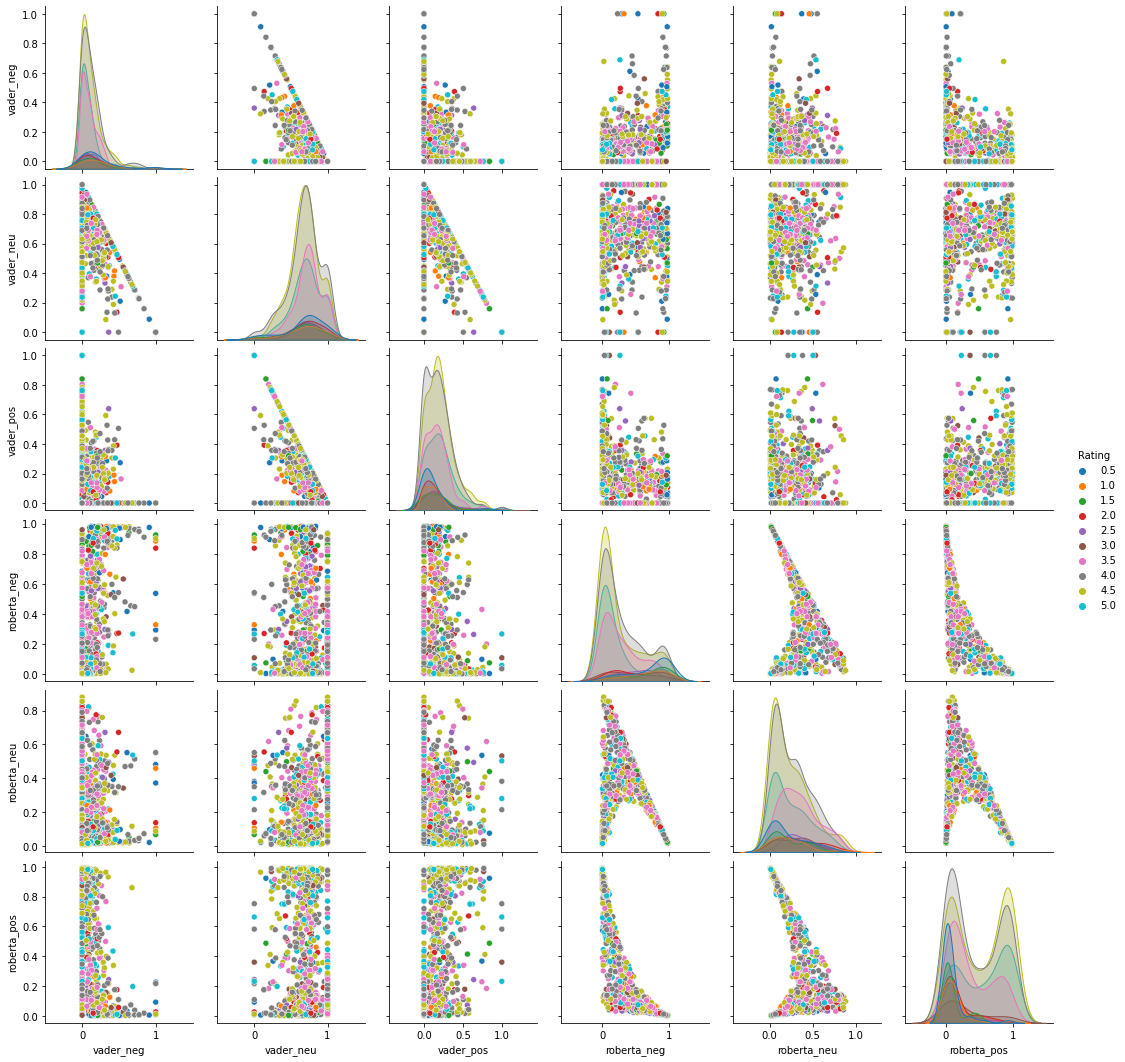

In [160]:
sns.pairplot(data=results_final,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

We can see that the RoBERTa model is much more confident in its assessment of positivity/negativity compared to the VADER model (in terms of numeric value).

# 7. Review Examples

Reviewing examples of positive 0.5 star reviews and negative 5 star reviews

In [161]:
# Rating 0.5 that was given positive value by VADER
s = results_final.query("Rating == 0.5").sort_values('vader_pos', ascending=False)['processed_review'].values[0:5]
print(s)

['haha cool review' 'mgk better' 'did not enjoy piss baby'
 "woah, well this summed up this new generation i am not understanding anymore. awful, not funny, unlistenable neither in anyway important. lgbt music is not this shit, it's stephin merritt and his beautiful works."
 'lmao this should be a war crime']


In [162]:
# Rating 0.5 that was given positive value by RoBERTa
s = results_final.query("Rating == 0.5").sort_values('roberta_pos', ascending=False)['processed_review'].values[0:5]
print(s)

['haha cool review' 'favourites: 745 sticky' 'mgk better'
 "just because you're good at making music, doesn't mean the music is gonna be good, you know? if not, listen to this album. otherwise, don't."
 'nah.']


In [163]:
# Rating 5.0 that was given negative value by VADER
s = results_final.query("Rating == 5.0").sort_values('vader_neg', ascending=False)['processed_review'].values[0:5]
print(s)

['stupid horse' 'no kap' 'shit ive just been gecd'
 'i hate that i like this' 'holy shit i just went on a journey']


In [164]:
# Rating 5.0 that was given negative value by RoBERTa
s = results_final.query("Rating == 5.0").sort_values('roberta_neg', ascending=False)['processed_review'].values[0:5]
print(s)

['this is the worst album ever created' 'i hate that i like this'
 "what the fuck did i just listen to.and why haven't i listened to it 200 times already."
 'stupid horse'
 'my 100th “review” (i’ve barely written any actual reviews lmao)here is my place on this album: this is crack in music form. if you don’t like it, you stay far, far away from it. many people hate this album. many people hate crack. however, if you do crack, or if you do like this album, you can’t stop. it is incredibly fucking addicting. therefore, this album is crack in music form. thank you.']


### THE END